# Introduction

In [ ]:
"""
What? Probability Calibration for 3-class classification

This example illustrates how sigmoid calibration changes predicted probabilities for a 3-class classification 
problem. Illustrated is the standard 2-simplex, where the three corners correspond to the three classes. Arrows 
point from the probability vectors predicted by an uncalibrated classifier to the probability vectors predicted 
by the same classifier after sigmoid calibration on a hold-out validation set. Colors indicate the true class 
of an instance (red: class 1, green: class 2, blue: class 3).
"""

# Import modules

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Data

In [ ]:
"""
Below, we generate a classification dataset with 2000 samples, 2 features and 3 target classes. We then split the data as follows:

    train: 600 samples (for training the classifier)
    valid: 400 samples (for calibrating predicted probabilities)
    test: 1000 samples

"""

In [3]:
np.random.seed(0)

X, y = make_blobs(n_samples=2000, n_features=2, centers=3, random_state=42,
                  cluster_std=5.0)
X_train, y_train = X[:600], y[:600]
X_valid, y_valid = X[600:1000], y[600:1000]
X_train_valid, y_train_valid = X[:1000], y[:1000]
X_test, y_test = X[1000:], y[1000:]

# Fitting and calibration [UNCALIBRATED]

In [ ]:
"""
First, we will train a RandomForestClassifier with 25 base estimators (trees) on the concatenated train and 
validation data (1000 samples). This is the uncalibrated classifier.
"""

In [5]:
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_valid, y_train_valid)

RandomForestClassifier(n_estimators=25)

In [ ]:
"""
To train the calibrated classifier, we start with the same RandomForestClassifier but train it using only the 
train data subset (600 samples) then calibrate, with method='sigmoid', using the valid data subset (400 samples) 
in a 2-stage process.
"""

In [7]:
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)
cal_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
cal_clf.fit(X_valid, y_valid)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=25),
                       cv='prefit')

# Compare probabilities

In [ ]:
"""
Below we plot a 2-simplex with arrows showing the change in predicted probabilities of the test samples.
"""

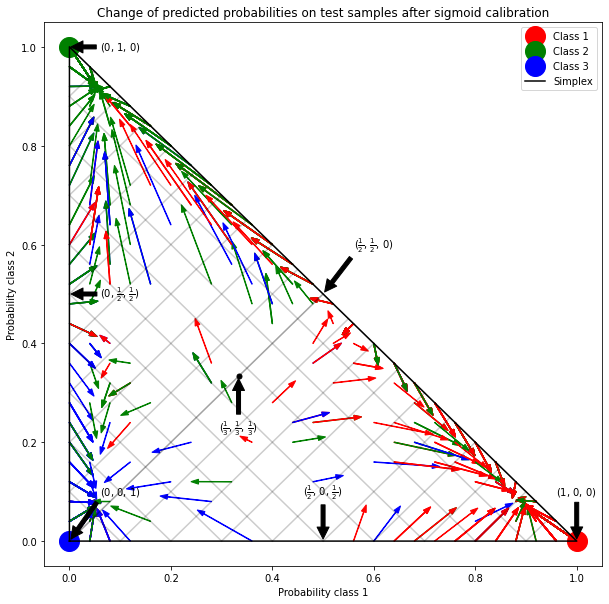

In [9]:
plt.figure(figsize=(10, 10))
colors = ["r", "g", "b"]

clf_probs = clf.predict_proba(X_test)
cal_clf_probs = cal_clf.predict_proba(X_test)
# Plot arrows
for i in range(clf_probs.shape[0]):
    plt.arrow(clf_probs[i, 0], clf_probs[i, 1],
              cal_clf_probs[i, 0] - clf_probs[i, 0],
              cal_clf_probs[i, 1] - clf_probs[i, 1],
              color=colors[y_test[i]], head_width=1e-2)

# Plot perfect predictions, at each vertex
plt.plot([1.0], [0.0], 'ro', ms=20, label="Class 1")
plt.plot([0.0], [1.0], 'go', ms=20, label="Class 2")
plt.plot([0.0], [0.0], 'bo', ms=20, label="Class 3")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

# Annotate points 6 points around the simplex, and mid point inside simplex
plt.annotate(r'($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)',
             xy=(1.0/3, 1.0/3), xytext=(1.0/3, .23), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.plot([1.0/3], [1.0/3], 'ko', ms=5)
plt.annotate(r'($\frac{1}{2}$, $0$, $\frac{1}{2}$)',
             xy=(.5, .0), xytext=(.5, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $\frac{1}{2}$, $\frac{1}{2}$)',
             xy=(.0, .5), xytext=(.1, .5), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($\frac{1}{2}$, $\frac{1}{2}$, $0$)',
             xy=(.5, .5), xytext=(.6, .6), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $0$, $1$)',
             xy=(0, 0), xytext=(.1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($1$, $0$, $0$)',
             xy=(1, 0), xytext=(1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $1$, $0$)',
             xy=(0, 1), xytext=(.1, 1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
# Add grid
plt.grid(False)
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Change of predicted probabilities on test samples "
          "after sigmoid calibration")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
_ = plt.legend(loc="best")

In [ ]:
"""
In the figure above, each vertex of the simplex represents a perfectly predicted class (e.g., 1, 0, 0). 
The mid point inside the simplex represents predicting the three classes with equal probability 
(i.e., 1/3, 1/3, 1/3). Each arrow starts at the uncalibrated probabilities and end with the arrow 
head at the calibrated probability. The color of the arrow represents the true class of that test sample.

The uncalibrated classifier is overly confident in its predictions and incurs a large log loss. The calibrated 
classifier incurs a lower log loss due to two factors. First, notice in the figure above that the arrows generally
point away from the edges of the simplex, where the probability of one class is 0. Second, a large proportion of 
the arrows point towards the true class, e.g., green arrows (samples where the true class is ‘green’) generally 
point towards the green vertex. This results in fewer over-confident, 0 predicted probabilities and at the same
time an increase in the the predicted probabilities of the correct class. Thus, the calibrated classifier produces
more accurate predicted probablities that incur a lower log loss

We can show this objectively by comparing the log loss of the uncalibrated and calibrated classifiers on the
predictions of the 1000 test samples. Note that an alternative would have been to increase the number of base
estimators (trees) of the RandomForestClassifier which would have resulted in a similar decrease in log loss.
"""

In [11]:
score = log_loss(y_test, clf_probs)
cal_score = log_loss(y_test, cal_clf_probs)

print("Log-loss of")
print(f" * uncalibrated classifier: {score:.3f}")
print(f" * calibrated classifier: {cal_score:.3f}")

Log-loss of
 * uncalibrated classifier: 1.290
 * calibrated classifier: 0.549


In [ ]:
"""
Finally we generate a grid of possibile uncalibrated probabilities over the 2-simplex, compute the 
corresponding calibrated probabilities and plot arrows for each. The arrows are colored according the 
highest uncalibrated probability. This illustrates the learned calibration map:
"""

In [12]:
plt.figure(figsize=(10, 10))
# Generate grid of probability values
p1d = np.linspace(0, 1, 20)
p0, p1 = np.meshgrid(p1d, p1d)
p2 = 1 - p0 - p1
p = np.c_[p0.ravel(), p1.ravel(), p2.ravel()]
p = p[p[:, 2] >= 0]

# Use the three class-wise calibrators to compute calibrated probabilities
calibrated_classifier = cal_clf.calibrated_classifiers_[0]
prediction = np.vstack([calibrator.predict(this_p)
                        for calibrator, this_p in
                        zip(calibrated_classifier.calibrators, p.T)]).T

# Re-normalize the calibrated predictions to make sure they stay inside the
# simplex. This same renormalization step is performed internally by the
# predict method of CalibratedClassifierCV on multiclass problems.
prediction /= prediction.sum(axis=1)[:, None]

# Plot changes in predicted probabilities induced by the calibrators
for i in range(prediction.shape[0]):
    plt.arrow(p[i, 0], p[i, 1],
              prediction[i, 0] - p[i, 0], prediction[i, 1] - p[i, 1],
              head_width=1e-2, color=colors[np.argmax(p[i])])

# Plot the boundaries of the unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

plt.grid(False)
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Learned sigmoid calibration map")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.show()

AttributeError: '_CalibratedClassifier' object has no attribute 'calibrators'

<Figure size 720x720 with 0 Axes>